In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pathlib import Path

# make sure plots are displayed correctly on notebooks
%pylab inline
%matplotlib inline
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# FFT, Power Spectrum, Energy

Mean of f  -1.4210854715202004e-17


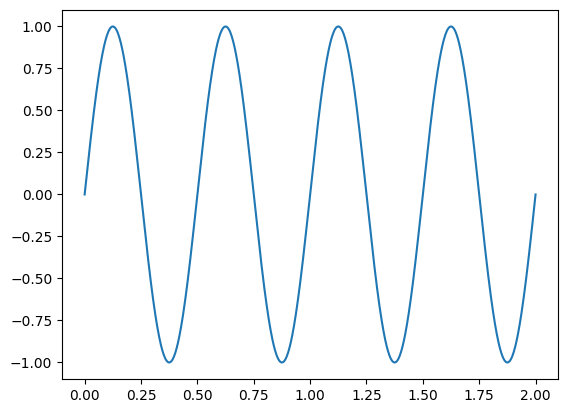

In [2]:
starttime = 0.0
endtime = 2.0
steps = 1000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

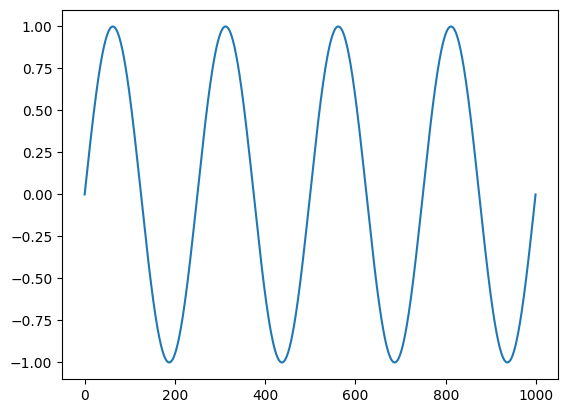

In [3]:
f = f - dc
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

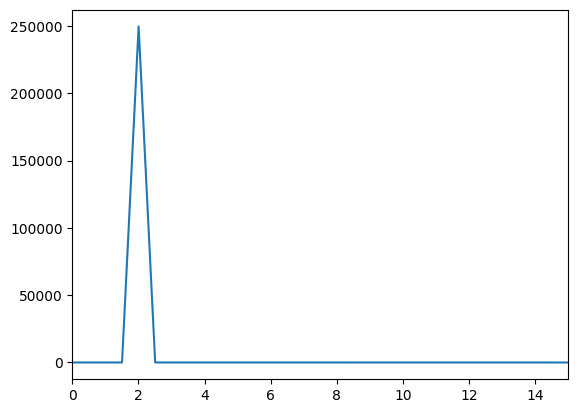

In [4]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [5]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]
for i in range(len(theta)):
    print(theta[i], powspec[2*theta[i]]) 

2 249736.73880337158
4 0.4459767961933231
12 0.02950275086152221


In [6]:
np.sum(powspec) # this is probably what Dambre calls total energy E_tot

249749.9999208767

In [7]:
de_fi = powspec[2*theta[i]]/np.sum(powspec)

In [8]:
de_fi

1.18129132616092e-07

## Test with Linear Reservoir

In [9]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [10]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

linear_reservoir = Reservoir(1, 1, bias=True, activation=identity_activation)

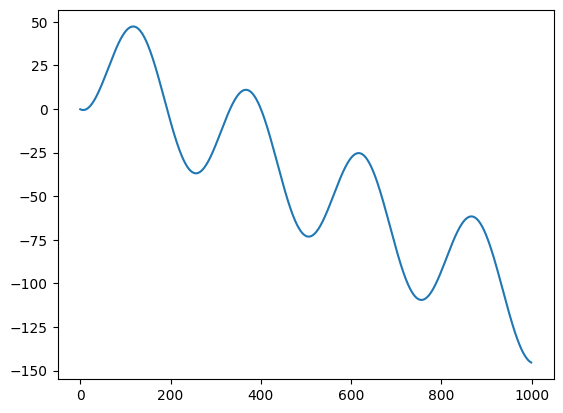

In [11]:
f_res = linear_reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

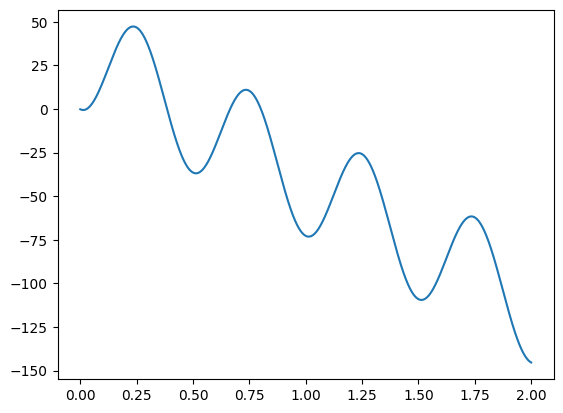

In [12]:
plt.plot(t, f_res)

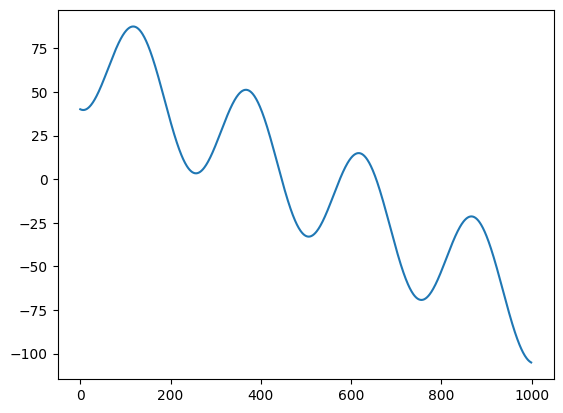

In [13]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

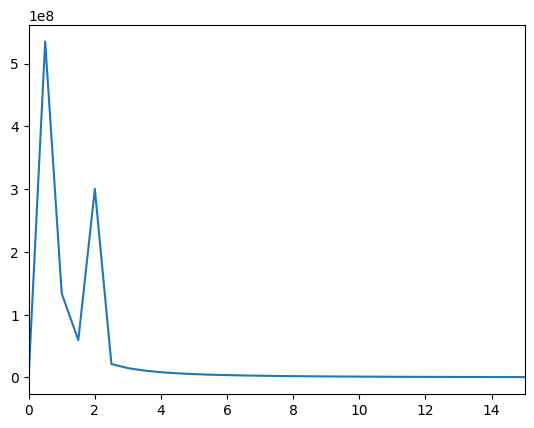

In [14]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [15]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 300306898.5459928


In [16]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [17]:
de_fi

0.7381843152690897

## Test with Nonlinear Reservoir

In [18]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [19]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

reservoir = Reservoir(1, 1, bias=True)

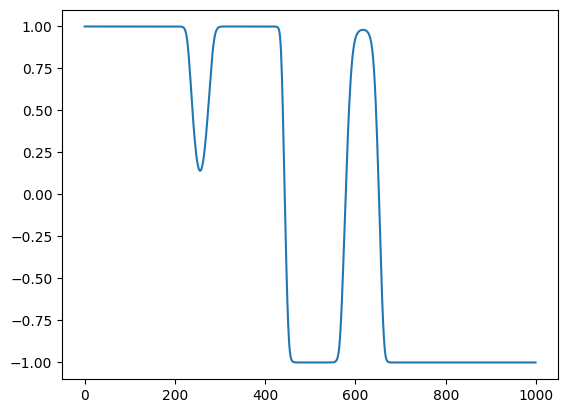

In [20]:
f_res = reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

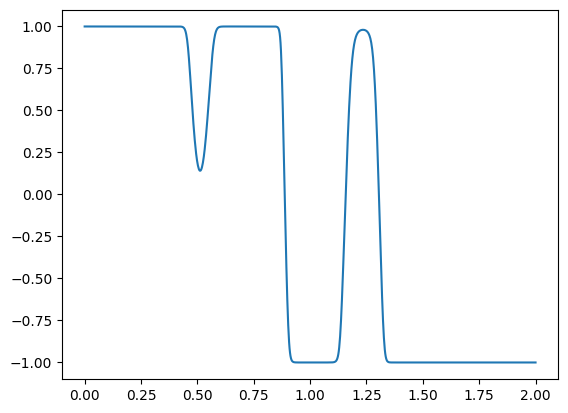

In [21]:
plt.plot(t, f_res)

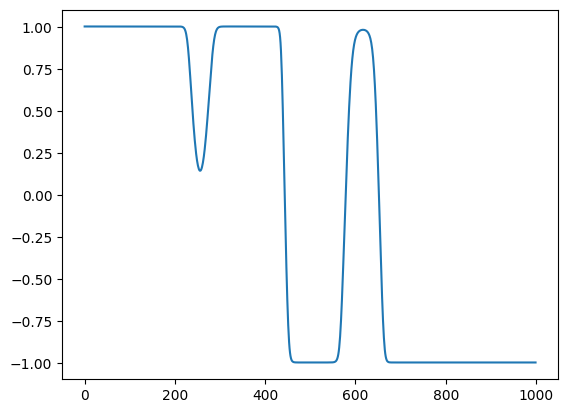

In [22]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

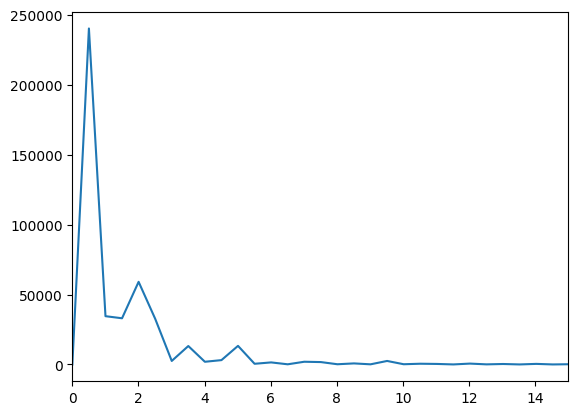

In [23]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [24]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 59081.1884466958


In [25]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [26]:
de_fi

0.8684866657553109

## Generalize to more than one unit

In [27]:
def deviation_from_linearity(signal, theta, verbose = True):
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    fhat = np.fft.fft(signal)
    N = len(fhat)
    halvedfhat = fhat[0:int(N/2)]
    powspec = abs(halvedfhat)**2

    fs = steps/(endtime - starttime)

    freq = np.linspace(0,int(fs/2),int(N/2))
    de_phi =  (1 - powspec[2*theta]/np.sum(powspec))

    if verbose: 
        print(f"Frequence:{theta}, Deviation: {de_phi}, Powerspect: {powspec[2*theta]}, Total Energy: {np.sum(powspec)}") 

        plt.plot(freq,powspec)
        plt.xlim([0, 100])

    return de_phi

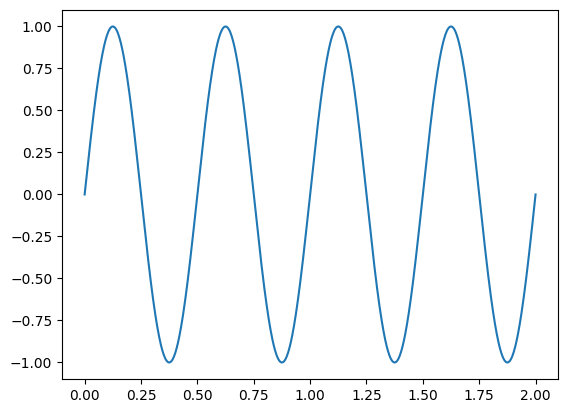

In [28]:
f = np.sin(2*np.pi*theta[0]*t) 
plt.plot(t, f)

In [29]:
reservoir = Reservoir(1, 10, bias=True, ro_rescale=0.9)
linear_reservoir = Reservoir(1, 10, bias=True,  activation=torch.nn.Identity(), ro_rescale=0.9)

In [30]:
f_res = reservoir.predict(f).numpy()
f_rlin = linear_reservoir.predict(f).numpy()

In [31]:
f_res.shape

(1000, 10)

In [32]:
# Subtract the DC component
f_res -= np.mean(f_res, axis=0)
f_rlin -= np.mean(f_rlin, axis=0)

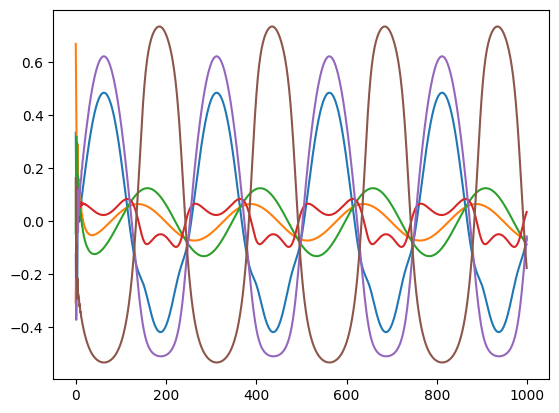

In [33]:
plt.plot(np.arange(len(f_res)), f_res[:,5])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,8])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,1])
plt.plot(np.arange(len(f_res)), f_res[:,3])
plt.plot(np.arange(len(f_rlin)), f_res[:,4])
plt.plot(np.arange(len(f_rlin)), f_res[:,1])

In [34]:
# Average over all neurons
f_res = np.mean(f_res, axis=1)
f_rlin = np.mean(f_rlin, axis=1)

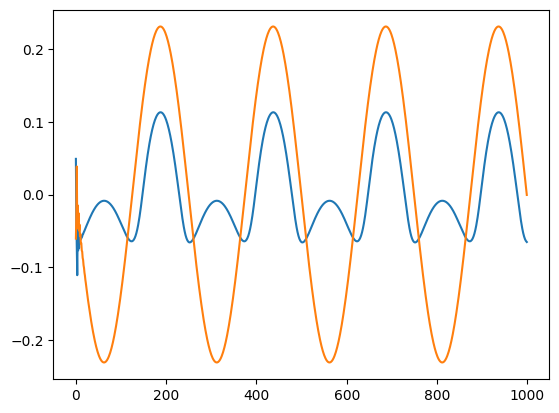

In [35]:
plt.plot(np.arange(len(f_res)), f_res)
plt.plot(np.arange(len(f_rlin)), f_rlin)

Frequence:2, Deviation: 0.5226654963799311, Powerspect: 801.2543091871466, Total Energy: 1678.6012808847765
0.5226654963799311
Frequence:2, Deviation: 0.00033671220353415077, Powerspect: 13336.835635916055, Total Energy: 13341.327823805681
0.00033671220353415077


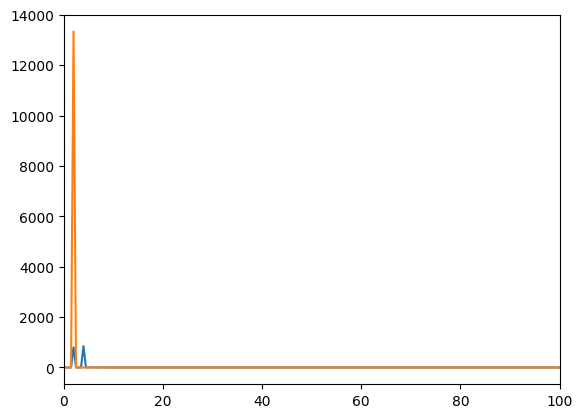

In [36]:
print(deviation_from_linearity(f_res, 2))
print(deviation_from_linearity(f_rlin, 2))

### Last step - Iterate over a range of initial carrier frequency

The range and the rescaling of the carrier frequencies for the various input sinussoids determines the scale of the metric. 

On the other hand, such a scale also depends on the spectral radius of the reservoir. 

In [37]:
theta_range = (np.linspace(0.01, 0.5, 100)*200).astype(int)

In [38]:
theta_range

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [39]:
result_table = torch.zeros(2,2)

Frequence:2, Deviation: 0.2618208636353687, Powerspect: 60.77508021199481, Total Energy: 82.33107279528194
Frequence:2, Deviation: 0.25827948099178, Powerspect: 60.793141401013116, Total Energy: 81.96232926426481
Frequence:3, Deviation: 0.2583278277156664, Powerspect: 60.82884657870438, Total Energy: 82.01581352493366
Frequence:4, Deviation: 0.2584213886502196, Powerspect: 60.87714113673818, Total Energy: 82.09128500339698
Frequence:5, Deviation: 0.25854620229997627, Powerspect: 60.93712081629128, Total Energy: 82.18599864929834
Frequence:6, Deviation: 0.2587047539245888, Powerspect: 61.00786715784304, Total Energy: 82.2990130866653
Frequence:7, Deviation: 0.25890275862535694, Powerspect: 61.08832046534788, Total Energy: 82.42956127057855
Frequence:8, Deviation: 0.25914902014639574, Powerspect: 61.17735189089781, Total Energy: 82.57713569196703
Frequence:9, Deviation: 0.25945388001750536, Powerspect: 61.273823803377006, Total Energy: 82.74140144684766
Frequence:10, Deviation: 0.2598294

Frequence:18, Deviation: 0.2666880131671424, Powerspect: 62.32428518087866, Total Energy: 84.99013557661115
Frequence:19, Deviation: 0.2681264840202653, Powerspect: 62.45033126823077, Total Energy: 85.32940447316308
Frequence:20, Deviation: 0.2696938150117293, Powerspect: 62.576954322461795, Total Energy: 85.68591586481885
Frequence:21, Deviation: 0.27138252968385024, Powerspect: 62.70386048543389, Total Energy: 86.05868379497744
Frequence:22, Deviation: 0.27318267102392335, Powerspect: 62.83062392815034, Total Energy: 86.44623817192782
Frequence:23, Deviation: 0.27508154862052914, Powerspect: 62.95673007195968, Total Energy: 86.84663764890696
Frequence:24, Deviation: 0.2770641704986243, Powerspect: 63.08145577916601, Total Energy: 87.25733765702918
Frequence:25, Deviation: 0.27911349699781385, Powerspect: 63.20394057975741, Total Energy: 87.67530022623511
Frequence:26, Deviation: 0.28121151886883966, Powerspect: 63.32318744807792, Total Energy: 88.09710938665289
Frequence:27, Deviatio

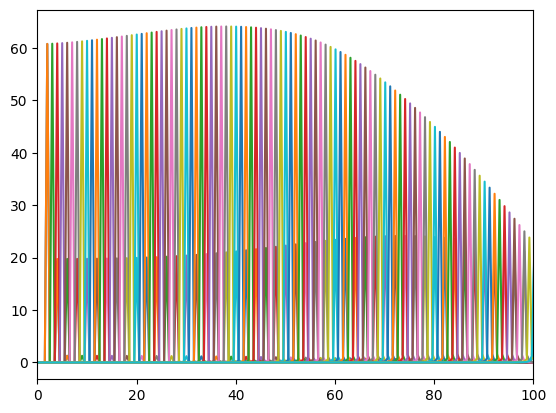

In [40]:
de_acc = 0
reservoir = Reservoir(1, 100, bias=True, ro_rescale=0.9)

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

de_fi = de_acc/len(theta_range)
result_table[0,0] = de_fi
print(de_fi)



Frequence:2, Deviation: 0.28883357496714246, Powerspect: 54.80665938871598, Total Energy: 77.06587018106737
Frequence:2, Deviation: 0.2840897059524492, Powerspect: 54.82207181986411, Total Energy: 76.57673353167739
Frequence:3, Deviation: 0.2838791650648367, Powerspect: 54.89682171326217, Total Energy: 76.65860150296068
Frequence:4, Deviation: 0.2835737813285849, Powerspect: 54.999462079572396, Total Energy: 76.76919220176892
Frequence:5, Deviation: 0.2831740735442425, Powerspect: 55.128469759130006, Total Energy: 76.90635581738063
Frequence:6, Deviation: 0.28268650935202466, Powerspect: 55.28201997346956, Total Energy: 77.06814481285066
Frequence:7, Deviation: 0.28212625748727604, Powerspect: 55.45792302773191, Total Energy: 77.25303175683284
Frequence:8, Deviation: 0.2815155443160232, Powerspect: 55.65380976678457, Total Energy: 77.46000532997436
Frequence:9, Deviation: 0.28088204534659433, Powerspect: 55.86727995520313, Total Energy: 77.68861783200722
Frequence:10, Deviation: 0.2802

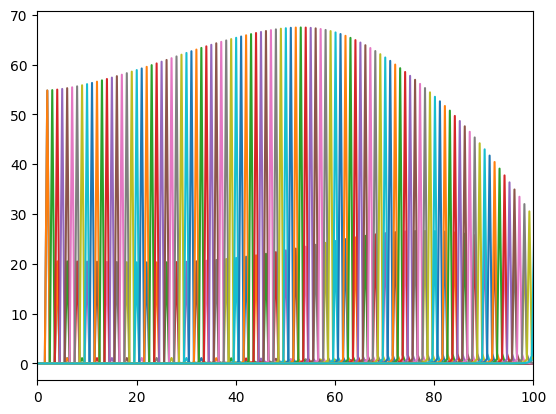

In [41]:
de_acc = []
reservoir.reset_initial_state()
reservoir.rescale_weights(0.99) #activation=torch.nn.Tanh())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)
    
    de_theta = deviation_from_linearity(f_res, theta, verbose=True)
    de_acc.append(de_theta)


de_fi = sum(de_acc)/len(theta_range)
result_table[1,0] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.04195058946247565, Powerspect: 3576.704301374673, Total Energy: 3733.319244325742
Frequence:2, Deviation: 5.6003797629711194e-05, Powerspect: 3569.5280285623626, Total Energy: 3569.727946883893
Frequence:3, Deviation: 0.00016540580937862703, Powerspect: 3738.6213128356226, Total Energy: 3739.2398048219998
Frequence:4, Deviation: 0.0002609977041270195, Powerspect: 3964.8741304461946, Total Energy: 3965.909223648343
Frequence:5, Deviation: 0.0003804145283371474, Powerspect: 4236.0455557920295, Total Energy: 4237.657622317678
Frequence:6, Deviation: 0.0005240909689969708, Powerspect: 4539.212170202033, Total Energy: 4541.592377752078
Frequence:7, Deviation: 0.0006924197731463799, Powerspect: 4860.314470122351, Total Energy: 4863.682179833968
Frequence:8, Deviation: 0.0008855390861627344, Powerspect: 5184.561006187605, Total Energy: 5189.1562068329595
Frequence:9, Deviation: 0.0011032164883258977, Powerspect: 5496.468582908507, Total Energy: 5502.539074743422
Freq

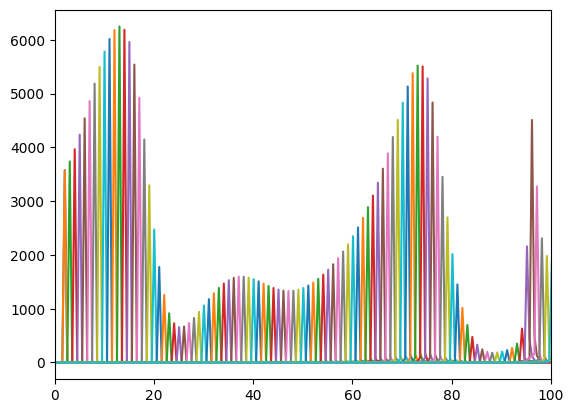

In [42]:
de_acc = [ ]
reservoir.reset_initial_state()
reservoir.activation = torch.nn.Identity()#)
reservoir.rescale_weights(0.99) 


for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc.append(deviation_from_linearity(f_res, theta, verbose=True))

de_fi = sum(de_acc)/len(theta_range)
result_table[1, 1] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.04195058946247565,  Powerspect: 3576.704301374673, Total Energy: 3733.319244325742
Frequence:2, Deviation: 5.6003797629711194e-05,  Powerspect: 3569.5280285623626, Total Energy: 3569.727946883893
Frequence:3, Deviation: 0.00016540580937862703,  Powerspect: 3738.6213128356226, Total Energy: 3739.2398048219998
Frequence:4, Deviation: 0.0002609977041270195,  Powerspect: 3964.8741304461946, Total Energy: 3965.909223648343
Frequence:5, Deviation: 0.0003804145283371474,  Powerspect: 4236.0455557920295, Total Energy: 4237.657622317678
Frequence:6, Deviation: 0.0005240909689969708,  Powerspect: 4539.212170202033, Total Energy: 4541.592377752078
Frequence:7, Deviation: 0.0006924197731463799,  Powerspect: 4860.314470122351, Total Energy: 4863.682179833968
Frequence:8, Deviation: 0.0008855390861627344,  Powerspect: 5184.561006187605, Total Energy: 5189.1562068329595
Frequence:9, Deviation: 0.0011032164883258977,  Powerspect: 5496.468582908507, Total Energy: 5502.53907474

0.056960797409787114

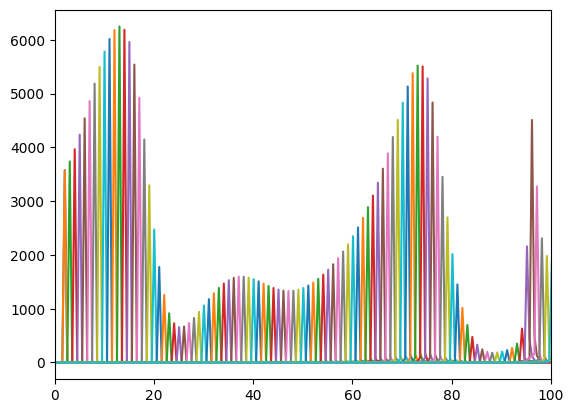

In [43]:
reservoir.reset_initial_state()
reservoir.de_fi(verbose=True, plot=True, theta_range=theta_range)

Frequence:2, Deviation: 0.02973984493435955,  Powerspect: 2495.1016580278115, Total Energy: 2571.5800499496054
Frequence:2, Deviation: 5.218361535974658e-05,  Powerspect: 2496.065180670215, Total Energy: 2496.19544117298
Frequence:3, Deviation: 0.0001225133060628325,  Powerspect: 2503.0767947769655, Total Energy: 2503.3834925649826
Frequence:4, Deviation: 0.00021405349529834972,  Powerspect: 2511.413007560266, Total Energy: 2511.950699387487
Frequence:5, Deviation: 0.0003308481284554077,  Powerspect: 2519.40484641558, Total Energy: 2520.238662660382
Frequence:6, Deviation: 0.00047266866707007527,  Powerspect: 2525.17319211585, Total Energy: 2526.3673267927343
Frequence:7, Deviation: 0.0006392904890774043,  Powerspect: 2526.615451009808, Total Energy: 2528.231725506108
Frequence:8, Deviation: 0.0008305462439316402,  Powerspect: 2521.5140857254723, Total Energy: 2523.610060582437
Frequence:9, Deviation: 0.0010463309212982441,  Powerspect: 2507.664022379153, Total Energy: 2510.29061707324

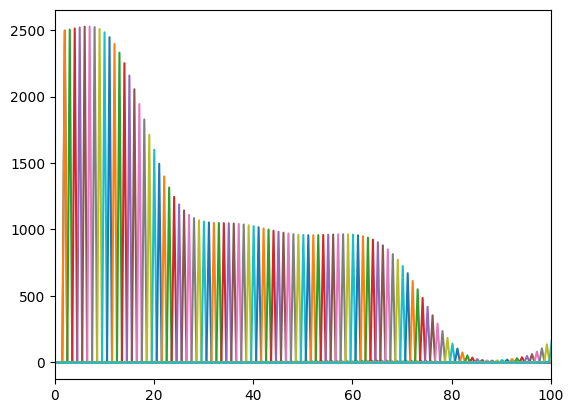

In [44]:
reservoir.reset_initial_state()
reservoir.rescale_weights(0.9)
de_fi = reservoir.de_fi(verbose=True, plot=True, theta_range=theta_range)
result_table[0,1] = de_fi
print(de_fi)

## Summing Up 

In [45]:
result_table = result_table.numpy()

## 

In [46]:
print("----------", "|", "-- Tanh --", "|", "-- Linear --" )
print("rho = 0.99", "|", result_table[1, 0], "|", result_table[1, 1] )
print("rho = 0.90",  "|",result_table[0, 0], "|", result_table[0, 1] )


---------- | -- Tanh -- | -- Linear --
rho = 0.99 | 0.28427956 | 0.0569608
rho = 0.90 | 0.28476563 | 0.06114385
